In [1]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; padding: 0px;}
.container {width:95% !important;}
</style>

In [1]:
%autosave 0
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib import animation
import ipywidgets as widgets
from functools import partial
slider_layout = widgets.Layout(width='600px', height='20px')
slider_style = {'description_width': 'initial'}
IntSlider_nice = partial(widgets.IntSlider, style=slider_style, layout=slider_layout, continuous_update=False)
SelSlider_nice = partial(widgets.SelectionSlider, style=slider_style, layout=slider_layout, continuous_update=False)

# Optimización

Es el proceso para:
- **(Prosa)** encontrar la mejor solución de un problema
- **(Matematicamente)** encontrar un valor extremo de una función

### Definiciones

- Función objetivo: Función continua que queremos optimizar, $f : \mathbb{R}^D \to \mathbb{R}$
    - Puede ser diferenciable
    - Puede ser convexa
- Valor extremo: Mínimo o máximo de la función objetivo, $ \max f(\vec x) \equiv \min - f(\vec x)$
    - Es suficiente hablar de minimización
- Un mínimo $x^*$ es tal que $f(x) > f(x^*)$ para $x \in \mathbb{S}$
    - Si $\mathbb{S}$ es igual al dominio de $f(x)$ entonces es un mínimo global
    - De lo contrario hablamos de un mínimo local
    - Una función convexa tiene sólo un mínimo
- La solución que buscamos podría estar sujeta a restricciones


### Problema general de optimización

Para una función $f : \mathbb{R}^D \to \mathbb{R}$
$$
\min_x f(x) ~ \text{s.a.} ~g(x) = 0, h(x) \leq 0,
$$
donde $g : \mathbb{R}^D \to \mathbb{R}^G$ y $h : \mathbb{R}^D \to \mathbb{R}^H$

#### Clasificación de problemas de optimización

- Una variable versus multi-variable
- Ecuaciones lineales o no-lineales (convexo o no convexo)
- Sin/con restricciones (sin/con desigualdades)

Mínimos cuadrados: Multi-variable, lineal, sin restricciones



### ¿Cómo encontrar el mínimo de una función continua sin restricciones?

Encontrar las raices (ceros) de la derivada/gradiente de $f$

$$
\nabla f (\theta^*) = \begin{pmatrix} \frac{\partial f}{\partial \theta_1}, \frac{\partial f}{\partial \theta_2}, \ldots, \frac{\partial f}{\partial \theta_D} \end{pmatrix} = \vec 0
$$

Las soluciones se conocen como puntos estacionarios de $f$

Luego si las segunda derivada/Hessiano de $f$

$$
H_{ij}^f (\theta^*)  = \frac{\partial^2 f}{\partial \theta_i \partial \theta_j} (\theta^*)
$$

es positiva/semi-definida positiva  entonces $\theta^*$ es un **mínimo local**


Receta
1. Obtener $\theta^*$ tal que $\nabla f (\theta^*)=0$
1. Probar que es un mínimo el Hessiano

##### Problema: Sólo sirve si podemos obtener una expresión análitica de $\theta$ a partir de $\nabla f (\theta^*)=0$

## Ejemplo: Regresión con elemento no-lineal

- Sea un conjunto de $M=100$ datos que corresponden a dos categorías, $y_i \in \{0, 1\}$
- Los datos son bidimensionales, $x_i \in \mathbb{R}^2$
- Para mapear los datos a la categoría pasar un **hiperplano** a través de  una **función no-lineal**

$$
\sigma \left ( \theta_0 + \theta_1 x_{i1} + \theta_2 x_{i2} \right) \approx y_i ~ \forall i=1,\ldots,100
$$
por ejemplo
$$
\sigma(z) = \frac{1}{1 + e^{-x}} \in [0, 1],
$$
que se conoce como función sigmoide

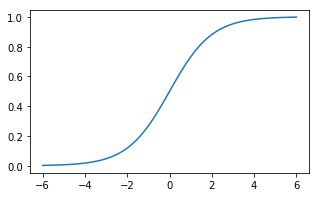

In [2]:
fig, ax = plt.subplots(figsize=(5, 3))
z = np.linspace(-6, 6, num=100)
ax.plot(z, 1/(1+np.exp(-z)));

Luego podemos intentar ajustar 

$$
\min_\theta \sum_{i=1}^M \left(y_i - \sigma \left ( \theta_0 + \theta_1 x_{i1} + \theta_2 x_{i2} \right)\right)^2
$$

Pero: 
- Ya no es lineal en sus parámetros
- No podremos despejar en función de $\theta$
- No hay solución análitica como en mínimos cuadrados lineal

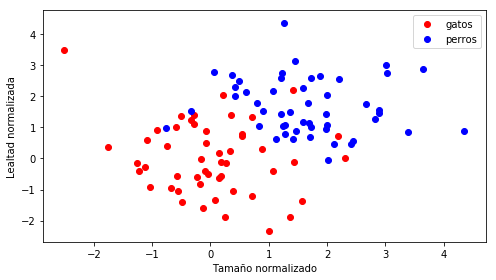

In [4]:
N = 100
X = np.concatenate((np.random.randn(N//2, 2), 1.5+np.random.randn(N//2, 2)), axis=0)
Y = np.concatenate((np.zeros(shape=(N//2, 1)), np.ones(shape=(N//2, 1))), axis=0)[:, 0]
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True)
ax.scatter(X[Y==0, 0], X[Y==0, 1], c='r', label='gatos')
ax.scatter(X[Y==1, 0], X[Y==1, 1], c='b', label='perros')
ax.set_ylabel('Lealtad normalizada')
ax.set_xlabel('Tamaño normalizado')
plt.legend();

# Búsqueda exhaustiva de la mejor solución

También conocido como "método de fuerza bruta"
1. Definimos una grilla para nuestro espacio de parámetros (dominio y resolución)
1. Para cada elemento de la grilla calculamos la función de costo
1. Buscamos el elemento con menor función de costo

Ventaja: Si la resolución es lo suficientemente fina podemos encontrar el mínimo global del dominio

Desventaja: Costo computacional, explosión combinatorial


Sea un modelo de $10$ parámetros con una resolución de $1000$ puntos cada uno: $1000^{10}$ evaluaciones de $f()$

In [9]:
%%time
def f(theta0, theta1, theta2):
    model = theta0 + theta1*X[:, 0] + theta2*X[:, 1]
    sig = 1./(1. + np.exp(-model))
    return np.mean((Y-sig)**2)

theta0 = np.linspace(-10, 10, num=10)
theta1 = np.linspace(-10, 10, num=10)
theta2 = np.linspace(-10, 10, num=10)

mse_plot = np.zeros(shape=(len(theta0), len(theta1), len(theta2)))
for k, t0_ in enumerate(theta0):
    for i, t1_ in enumerate(theta1):
        for j, t2_ in enumerate(theta2):
            mse_plot[k, i, j] = f(t0_, t1_, t2_)

CPU times: user 63.9 ms, sys: 65 µs, total: 63.9 ms
Wall time: 64 ms


Traceback (most recent call last):
  File "/home/fabian/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/home/fabian/.local/lib/python3.7/site-packages/matplotlib/animation.py", line 999, in _start
    self._init_draw()
  File "/home/fabian/.local/lib/python3.7/site-packages/matplotlib/animation.py", line 1740, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/home/fabian/.local/lib/python3.7/site-packages/matplotlib/animation.py", line 1765, in _draw_frame
    raise RuntimeError('The animation function must return a '
RuntimeError: The animation function must return a sequence of Artist objects.


-7.777777777777778

5.555555555555557

3.333333333333334

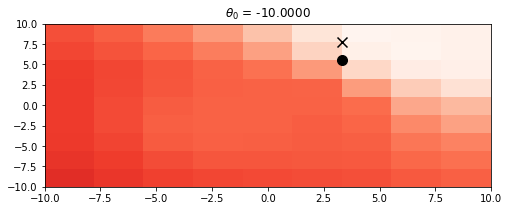

In [11]:
fig, ax = plt.subplots(figsize=(8, 3))
T1, T2 = np.meshgrid(theta1, theta2)
idx_all = np.unravel_index(np.argmin(mse_plot), mse_plot.shape)

def update_plot(idx):
    ax.cla()
    ax.set_title(r"$\theta_0$ = {0:0.4f}".format(theta0[idx]))
    cf = ax.pcolormesh(T1, T2, mse_plot[idx, :, :], cmap=plt.cm.Reds,
                     vmin=np.amin(mse_plot), vmax=np.amax(mse_plot))
    idx = np.unravel_index(np.argmin(mse_plot[idx, :, :]), mse_plot[0, :, :].shape)
    ax.scatter(theta1[idx[1]], theta2[idx[0]], s=100, c='k', marker='x');
    ax.scatter(theta1[idx_all[2]], theta2[idx_all[1]], s=100, c='k');
    ax.set_xlim((theta1[0], theta1[-1]))
    ax.set_ylim((theta2[0], theta2[-1]))

anim = animation.FuncAnimation(fig, update_plot, frames=len(theta0), 
                               interval=5000/len(theta0), repeat=False, blit=True)

display(theta0[idx_all[0]], theta1[idx_all[1]], theta2[idx_all[2]])

# Método iterativos: Newton


- Acercarse a la mejor solución paso a paso
- Encontrar en cada instante la mejor dirección

Sea el valor actual del vector de parámetros $\theta_t$

Queremos encontrar el mejor "próximo valor" según nuestra función objetivo
$$
\theta_{t+1} = \theta_t + \Delta \theta
$$
Consideremos la aproximación de Taylor de segundo orden de $f$
$$
f(\theta_{t} + \Delta \theta) \approx f(\theta_t) + \nabla f (\theta_t) \Delta \theta + \frac{1}{2} \Delta \theta^T H_f (\theta_t) \Delta \theta 
$$
Derivando en función de $\Delta \theta$ e igualando a cero tenemos
$$
\begin{align}
\nabla f (\theta_t)  +  H_f (\theta_t) \Delta \theta &= 0 \nonumber \\
\Delta \theta &= - [H_f (\theta_t)]^{-1}\nabla f (\theta_t)  \nonumber \\
\theta_{t+1} &= \theta_{t} - [H_f (\theta_t)]^{-1}\nabla f (\theta_t)  \nonumber \\
\end{align}
$$

- Se obtiene una regla iterativa en función del **Gradiente** y del **Hessiano**
- La solución depende de $\theta_0$
- "Asumimos" que la aproximación de segundo orden es "buena"
- Si nuestro modelo tiene $N$ parámetros el Hessiano es de $N\times N$, ¿Qué pasa si $N$ es grande?

# Gradiente descendente

Si el Hessiano es prohibitivo podemos usar una aproximación de primer orden

El método más clásico es el **gradiente descendente**
$$
\theta_{t+1} = \theta_{t} - \eta \nabla f (\theta_t)
$$

donde hemos reemplazado el Hessiano por una constante $\eta$ llamado "paso" o "tasa de aprendizaje"

¿Cómo cambia la optimización con distintos $\eta$?

Traceback (most recent call last):
  File "/home/fabian/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/home/fabian/.local/lib/python3.7/site-packages/matplotlib/animation.py", line 999, in _start
    self._init_draw()
  File "/home/fabian/.local/lib/python3.7/site-packages/matplotlib/animation.py", line 1740, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/home/fabian/.local/lib/python3.7/site-packages/matplotlib/animation.py", line 1765, in _draw_frame
    raise RuntimeError('The animation function must return a '
RuntimeError: The animation function must return a sequence of Artist objects.


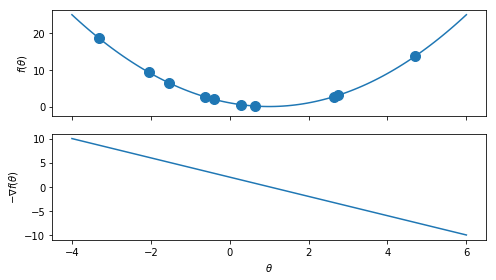

In [12]:
plt.close('all'); fig, ax = plt.subplots(2, figsize=(7, 4), tight_layout=True, sharex=True)
x = np.linspace(-4, 6, num=100)
f = lambda theta : (theta-1.)**2 #+ 10*np.sin(theta)
df = lambda theta : 2*(theta -1.) #+ 10*np.cos(theta)
df2 = lambda theta : 2 #- 10*np.cos(theta)

t = 10*np.random.rand(10) - 4.
ax[0].plot(x, f(x))
sc = ax[0].scatter(t, f(t), s=100)

ax[1].set_xlabel(r'$\theta$')
ax[0].set_ylabel(r'$f(\theta)$')
ax[1].plot(x, -df(x))
ax[1].set_ylabel(r'$-\nabla f(\theta)$')
eta = 0.01

def update(n):
    t = sc.get_offsets()[:, 0]
    t -= eta*df(t)
    #t -= df(t)/(df2(t)+10)
    sc.set_offsets(np.c_[t, f(t)])
    
anim = animation.FuncAnimation(fig, update, frames=100, interval=200, repeat=False, blit=True)

## Regresión con elemento no lineal usando gradiente descendente

- Calcule el gradiente de la función de costo en función de los parámetros
- Pruebe distintos valores de $\eta$ y estudie lo que ocurre con la solución
- ¿Cómo cambia la solución con la inicialización?

In [ ]:
np.random.seed(0)
# Dividir los datos en entrenamiento y validación
idx = np.split(np.random.permutation(len(X)), 4)
train_idx, valid_idx = np.hstack(idx[:-1]), idx[-1]
# Inicializar parámetros
theta0, theta1, theta2 = np.random.randn(3).T
sigmoid = lambda z: 1./(1+np.exp(-z))
nepochs, eta = 10, 1e-2
metrics = np.zeros(shape=(nepochs, 5))
# Gradiente descendente (batch)
for t in range(nepochs):
    model_v = theta0 + theta1*X[valid_idx, 0] + theta2*X[valid_idx, 1]
    model_t = theta0 + theta1*X[train_idx, 0] + theta2*X[train_idx, 1]
    tmp = -2*(Y[train_idx] - sigmoid(model_t))*(1 - sigmoid(model_t))
    theta0 -= ?
    theta1 -= ?
    theta2 -= ?
    metrics[t, 0] = np.mean((Y[train_idx] - sigmoid(model_t))**2)
    metrics[t, 1] = np.mean((Y[valid_idx] - sigmoid(model_v))**2)
    metrics[t, 2:] = np.array([theta0, theta1, theta2])
    if t % (nepochs/10) == 0:
        print(t, metrics[t, :])


fig, ax = plt.subplots(2, figsize=(7, 5), tight_layout=True)
ax[1].scatter(X[Y==0, 0], X[Y==0, 1], c='k', marker='x', label='perros')
ax[1].scatter(X[Y==1, 0], X[Y==1, 1], c='k', marker='o', label='gatos')
x_lim, y_lim = ax[1].get_xlim(), ax[1].get_ylim()
x = np.linspace(x_lim[0], x_lim[1], num=10)
y = np.linspace(y_lim[0], y_lim[1], num=10)
X_plot, Y_plot = np.meshgrid(x, y)
C = sigmoid(theta0 + theta1*X_plot + theta2*Y_plot)
cf = ax[1].contourf(X_plot, Y_plot, C, zorder=-100, cmap=plt.cm.RdBu_r)
plt.colorbar(cf, ax=ax[1])
plt.legend();
ax[0].plot(metrics[:, 0], 'k-');
ax[0].plot(metrics[:, 1], 'k--');
#ax[0].set_xscale('log')
ax2 = ax[0].twinx()
ax2.plot(metrics[:, 2:]);

# Modulo [`scipy.optimize`](https://docs.scipy.org/doc/scipy-1.3.0/reference/tutorial/optimize.html)

La función [`minimize`](https://docs.scipy.org/doc/scipy-1.3.0/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) engloba una batería de optimizadores 

- Optimización sin restricciones 
    - usando gradientes
        - CG: Gradiente conjugado. GD con paso adaptivo 
        - Newton-CG: Método de Newton con Hessiano
        - BFGS (default): Método [Quasi-Newton](https://en.wikipedia.org/wiki/Quasi-Newton_method) con Hessiano inverso aproximado a cada paso
    -  sin gradientes (para funciones no derivables o muy ruidosas)
        - [Nelder-Mead](https://www.youtube.com/watch?v=HUqLxHfxWqU): Heurística basada en evaluaciones de la función objetivo
        - [Powell](https://www.youtube.com/watch?v=4TYJGihyuDg): Búsqueda de linea en múltiples direcciones
- Optimización con restricciones
    - SLSQP: Sequential Least Squares Programming
    - COBYLA: Constrained Optimization BY Linear Approximation 
- Optimización global: [`brute`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brute.html#scipy.optimize.brute)



#### Ejemplo: 

Sea la función del manto sagrado. Encuentre el mínimo usando `optimize`

¿Cúantos mínimos globales existen? ¿Qué ocurre si inicializa en cero?

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
a = np.linspace(-2, 2, num=100)
b = np.linspace(-1, 1, num=100)
A, B = np.meshgrid(x, y)
C = (4 -2.1*A**2+A**4/3)*A**2 +A*B + (4*B**2 -4)*B**2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, C, cmap=plt.cm.cividis);

In [ ]:
import scipy.optimize

def f(x):
    return 0.0

x0 = 0.0
res = scipy.optimize.minimize(f, x0, options={'disp':True})

ax.scatter(res.x[0], res.x[1], f(res.x), s=100)

#### Ejemplo 2: 

Regresión con elemento no lineal usando optimize

In [ ]:
sigmoid = lambda z: 1/(1+np.exp(-z))

# Hay que proporcionar una función de Python que evalue la función de costo
def f(theta):
    model = theta[0] + theta[1]*X[train_idx, 0] + theta[2]*X[train_idx, 1]
    return np.mean((Y[train_idx] - sigmoid(model))**2)

# Opcionalmente se puede proporcionar el gradiente (jac) y el Hessiano (hess)
# de lo contrario se estiman numericamente
def df(theta):
    model = theta[0] + theta[1]*X[train_idx, 0] + theta[2]*X[train_idx, 1]
    #print(sigmoid(model))
    tmp = -2*(Y[train_idx] - sigmoid(model))*(1. - sigmoid(model))/len(train_idx)
    return np.array([np.sum(tmp), np.sum(tmp*X[train_idx, 0]), np.sum(tmp*X[train_idx, 1])])

# Valor inicial para los parámetros
np.random.seed(0)
theta0 = np.random.randn(3)
res = scipy.optimize.minimize(f, theta0,
                              method='CG', tol=1e-3, 
                              options={'disp': True, 'gtol': 1e-2})
display(res)

In [ ]:
theta = res.x
fig, ax = plt.subplots(1, figsize=(7, 3), tight_layout=True)
ax.scatter(X[Y==0, 0], X[Y==0, 1], c='k', marker='x', label='perros')
ax.scatter(X[Y==1, 0], X[Y==1, 1], c='k', marker='o', label='gatos')
x_lim, y_lim = ax.get_xlim(), ax.get_ylim()
x = np.linspace(x_lim[0], x_lim[1], num=20)
y = np.linspace(y_lim[0], y_lim[1], num=20)
X_plot, Y_plot = np.meshgrid(x, y)
C = sigmoid(theta[0] + theta[1]*X_plot + theta[2]*Y_plot)
cf = ax.contourf(X_plot, Y_plot, C, zorder=-100, cmap=plt.cm.RdBu_r)
plt.colorbar(cf);

### Optimización con restricciones usando SLSQP

Sea la siguiente función de costo
$$
\min f(x, y) = -(2xy+2x-x^2-2y^2) 
$$
sujeta a 
$$
x^3 - y = 0 ~\wedge~y-(x-1)^4-2 \geq 0 
$$
donde
$$
0.5\leq x \leq 1.5 ~\wedge~ 1.5 \leq y \leq 2.5
$$

In [ ]:
def f(x):
    return -(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2)

cons = ({'type': 'eq',
         'fun' : lambda x: np.array([x[0]**3 - x[1]]),
         'jac' : lambda x: np.array([3.0*(x[0]**2.0), -1.0])},
        {'type': 'ineq',
         'fun' : lambda x: np.array([x[1] - (x[0]-1)**4 - 2])})

bnds = ((0.5, 1.5), (1.5, 2.5))
x0 = np.array([0, 1])
res1 = scipy.optimize.minimize(f, x0, method='BFGS', 
                              options={'disp':True})
res2 = scipy.optimize.minimize(f, x0, method='L-BFGS-B', bounds=bnds,
                              options={'disp':True})
res3 = scipy.optimize.minimize(f, x0, method='SLSQP', 
                              constraints=cons, bounds=bnds,
                              options={'disp':True})

In [ ]:
x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)
A, B = np.meshgrid(x, y)
C = f(np.vstack([A.ravel(), B.ravel()])).reshape((100,100))
fig, ax = plt.subplots(figsize=(5, 3))
ax.contourf(A, B, C, );
ax.plot(x, x**3, 'k--', lw=2)
ax.plot(x, 2+(x-1)**4, 'k:', lw=2)
ax.fill([0.5, 0.5, 1.5, 1.5], [2.5, 1.5, 1.5, 2.5], alpha=0.3)
ax.axis([0, 3, 0, 3])
ax.scatter(res1.x[0], res1.x[1], s=20, c='b');
ax.scatter(res2.x[0], res2.x[1], s=20, c='g');
ax.scatter(res3.x[0], res3.x[1], s=20, c='r');

#### Ejemplo 

Nuevamente el aire sucio italiano

¿Podemos ajustar la frecuencia del modelo?

In [ ]:
%%bash
wget -c https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
unzip AirQualityUCI.zip

In [ ]:
import pandas as pd
df = pd.read_csv("AirQualityUCI.csv", sep=';', decimal=',')
df = df[df.columns[:-2]] 
df.dropna(inplace=True)
df["Date_time"] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format="%d/%m/%Y %H.%M.%S")
df.drop(["Date", "Time"], axis=1, inplace=True)
time, data = df.loc[(df["Date_time"] < pd.to_datetime("03/24/2004 18:00:00")) & (df["CO(GT)"] > -200)][["Date_time", "CO(GT)"]].values.T
data = data.astype('float32')
time_float = np.array([t.timestamp()/(24*3600) - time[0].timestamp()/(24*3600) for t in time])

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))
mask = time_float <= 7
ax.plot(time_float, data)

def model(time, theta):
    return theta[0] + theta[2]*np.cos(2.0*np.pi*time*theta[1]) + theta[3]*np.sin(2.0*np.pi*time*theta[1]) +\
+ theta[4]*np.cos(2.0*np.pi*time*theta[1]*2) + theta[5]*np.sin(2.0*np.pi*time*theta[1]*2) 

def residual(theta, *args):
    time, data = args
    return np.sum((data - model(time, theta))**2)

theta0 = np.random.rand(6)
res = scipy.optimize.minimize(residual, theta0, method='Powell',
                              args=(time_float[mask], data[mask]))
ax.plot(time_float, model(time_float, res.x))
print(res.x)

### Consideraciones prácticas
- Escoger apropiadamente nuestro optimizador
- Ser cuidadoso con las soluciones iniciales
- Revisar la convergencia de los algoritmos

### Apéndices

- [Raices de una función](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html#scipy.optimize.root)
- [Mínimos cuadrados no lineal y con cotas](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html#scipy.optimize.least_squares) 
- [Programación lineal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html#scipy.optimize.linprog)
- [Comparativa detallada entre los distintos métodos de optimización](https://scipy-lectures.org/advanced/mathematical_optimization/index.html) [2](http://fa.bianp.net/blog/2013/numerical-optimizers-for-logistic-regression/)